### Import the required libraries

In [13]:
import pandas as pd
from darts import TimeSeries

### Import and read the dataset

In [14]:
data = pd.read_csv("monthly-beer-production-in-australia.csv")

data.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


### Check the number of rows and columns in the dataset

In [15]:
data.shape

(476, 2)

### Split the dataset into training set and testing set. Here, I am choosing the 275th time period ('1978-10') to make the split because there are 477 rows.

In [16]:
get_data = TimeSeries.from_dataframe(data, 'Month', 'Monthly beer production')

train_data, test_data = get_data.split_before(pd.Timestamp('1978-10'))

### Train the model. fit() method is used to fit the dataset in the model.

In [17]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()

model.fit(train_data)

### Make the predictions

In [18]:
prediction = model.predict(len(test_data))

print("Predicted", prediction[:5])

print("Actual", test_data[:5])

Predicted <TimeSeries (DataArray) (Month: 5, component: 1, sample: 1)>
array([[[175.77863437]],

       [[185.59344189]],

       [[199.95206707]],

       [[168.38141606]],

       [[160.35512731]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1978-10-01 1978-11-01 ... 1979-02-01
  * component  (component) object 'Monthly beer production'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
Actual <TimeSeries (DataArray) (Month: 5, component: 1, sample: 1)>
array([[[172.1]],

       [[198.4]],

       [[217.8]],

       [[173.7]],

       [[153.8]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1978-10-01 1978-11-01 ... 1979-02-01
  * component  (component) object 'Monthly beer production'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


### Plot the graph

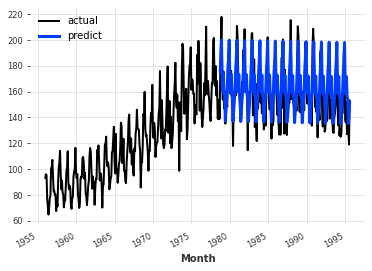

In [19]:
import matplotlib.pyplot as plt

get_data.plot(label='actual')

prediction.plot(label='predict', lw=3)

plt.legend()

### The monthly values after year 1978 are forecasted.